In [1]:
import os

from scipy import sparse as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn import metrics 
from sklearn import cluster
from sklearn.utils import sparsefuncs

<AxesSubplot:xlabel='x', ylabel='y'>

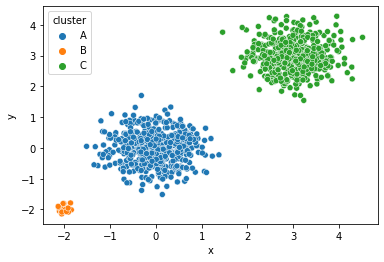

In [5]:
# Generate gaussian blobs simulating an imbalanced clustering setting
c_1 = np.random.normal(loc = 0, scale = 0.5, size = (500, 2))
c_2 = np.random.normal(loc = -2, scale = 0.1, size = (20, 2))
c_3 = np.random.normal(loc = 3, scale = 0.5, size = (500, 2))

# Plot the given results 
cluster_df = pd.DataFrame({
    "x" : np.concatenate((c_1[:, 0], c_2[:, 0], c_3[:, 0])),
    "y" : np.concatenate((c_1[:, 1], c_2[:, 1], c_3[:, 1])),
    "cluster": np.concatenate(
        (
            np.repeat("A", len(c_1)),
            np.repeat("B", len(c_2)),
            np.repeat("C", len(c_3))
        )
    )
})
sns.scatterplot(
    x = "x",
    y = "y",
    hue = "cluster",
    data = cluster_df
)


Silhouette value is: 0.739
Davies Bouldin value is: 0.283
Calinski Harabasz value is: 5292.95


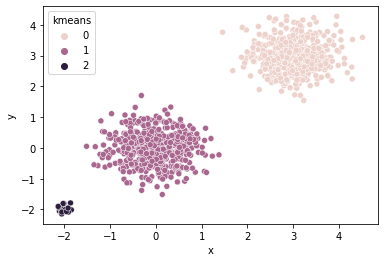

In [9]:
# Perform k-means clustering, calculate label-free metrics for 
# correct usage of k in the given scenario 
cluster_arr = np.array(cluster_df.iloc[:, 0:2])
kmeans_res = cluster.KMeans(n_clusters = 3).fit_predict(X = cluster_arr)
cluster_df["kmeans"] = kmeans_res
sns.scatterplot(
    x = "x",
    y = "y",
    hue = "kmeans",
    data = cluster_df
)
sil_val = metrics.silhouette_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
db_val = metrics.davies_bouldin_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
ch_val = metrics.calinski_harabasz_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
print("Silhouette value is: " + str(round(sil_val, 3)))
print("Davies Bouldin value is: " + str(round(db_val, 3)))
print("Calinski Harabasz value is: " + str(round(ch_val, 3)))

Silhouette value is: 0.785
Davies Bouldin value is: 0.301
Calinski Harabasz value is: 7864.539


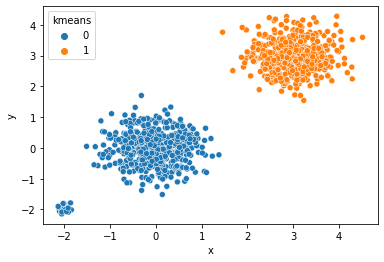

In [10]:
# Perform k-means clustering, calculate label-free metrics for 
# incorrect usage of k which joins smaller cluster with larger
cluster_arr = np.array(cluster_df.iloc[:, 0:2])
kmeans_res = cluster.KMeans(n_clusters = 2).fit_predict(X = cluster_arr)
cluster_df["kmeans"] = kmeans_res
sns.scatterplot(
    x = "x",
    y = "y",
    hue = "kmeans",
    data = cluster_df
)
sil_val = metrics.silhouette_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
db_val = metrics.davies_bouldin_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
ch_val = metrics.calinski_harabasz_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
print("Silhouette value is: " + str(round(sil_val, 3)))
print("Davies Bouldin value is: " + str(round(db_val, 3)))
print("Calinski Harabasz value is: " + str(round(ch_val, 3)))

This seems to actually result in an **increase** of these metrics! This is because they don't have access to the ground-truth labels, and are going off of intra and inter-cluster distances. In the second setting, because clustering 2 with 1 leads to an overall increase in distance between 2 and 0 (the orange cluster), this leads to an increase in these scores overall. 

Accounting for imbalance will be difficult in these settings - need to account for other pathologies first.